In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [80]:
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
dataset = pd.DataFrame(pd.read_csv(url))
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
scaler = StandardScaler()
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# apply scaler to the above variables
dataset[num_vars] = scaler.fit_transform(dataset[num_vars])
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [82]:
# separate explanatory variables and ground truths
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, [8]].values
# x[0:10]
# y[0:10]

In [83]:
# split dataset into training and validation sets
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [84]:
# perform logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [85]:
y_pred = classifier.predict(x_test)
# y_pred[0:9]

In [86]:
print(f'Loss: {metrics.log_loss(y_test, y_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred)}')

Loss: 9.596037590609113
Accuracy: 0.7337662337662337
Precision: 0.6428571428571429
Recall: 0.5094339622641509
F1 score: 0.5684210526315789


In [87]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 15],
       [26, 27]])

Text(0.5, 427.9555555555555, 'Predicted label')

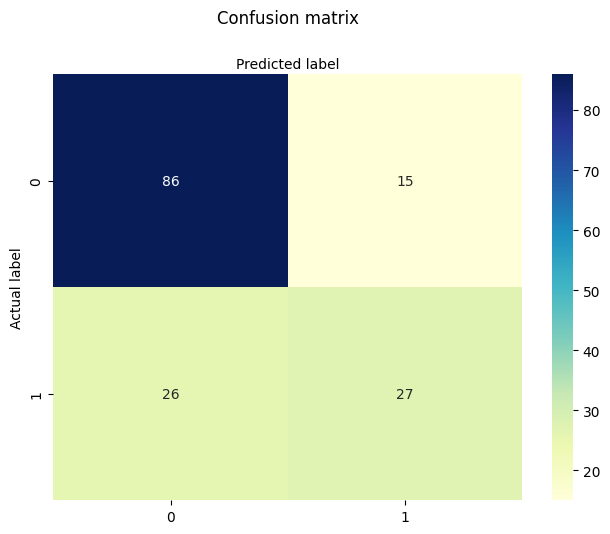

In [88]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')